In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'],axis=1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [13]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

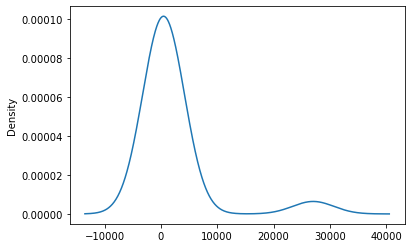

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts<500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [10]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [11]:
# Look at AFFILIATION value counts for binning
affiliation_counts = application_df["AFFILIATION"].value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

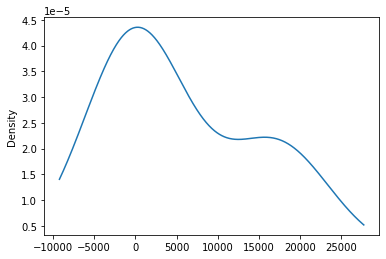

In [12]:
affiliation_counts.plot.density()

## Reduce Noisy Data - bin Income Amount column

In [14]:
# Look at INCOME_AMT value counts for binning
income_amt_count = application_df["INCOME_AMT"].value_counts()
income_amt_count

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

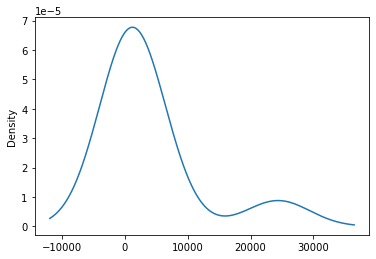

In [15]:
income_amt_count.plot.density()

In [18]:
# Determine which values to replace if counts are less than ..?
replace_income_amount = list(income_amt_count[income_amt_count < 5000].index)

# Replace in dataframe
for cls in replace_income_amount:
    application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['INCOME_AMT'].value_counts()

0        24388
Other     9911
Name: INCOME_AMT, dtype: int64

In [19]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [20]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [21]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(application_cat,1)
application_df.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [22]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"],1).values
y = application_df["IS_SUCCESSFUL"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=13,stratify=y)

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Run the same model as before to see what effect binning income_amt data had

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer_1 = 80
hidden_nodes_layer_2 = 30

nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_1, input_dim = number_input_features, activation = 'relu')
)

# Second hidden layer
nn1.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_2, activation = 'relu')
)

# Output layer
nn1.add(
    tf.keras.layers.Dense(units=1,activation='sigmoid')
)

# Check the structure of the model
nn1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                2960      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,421
Trainable params: 5,421
Non-trainable params: 0
_________________________________________________________________


In [32]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint_1 path and filenames
os.makedirs("checkpoints1/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"

In [33]:
# Compile the model
nn1.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

In [34]:
# Train the model
fit_model = nn1.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5713 - accuracy: 0.7189
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5599 - accuracy: 0.7234
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7254
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7253
Epoch 5/100
787/804 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7265
Epoch 5: saving model to checkpoints1/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7266
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7280
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7256
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7262
Epoch 9/100
804/804 [==============================] 

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5577 - accuracy: 0.7289 - 338ms/epoch - 1ms/step
Loss: 0.5576744675636292, Accuracy: 0.728863000869751


In [36]:
# Export our model to HDF5 file
nn1.save("AlphabetSoupCharity_Optimization_Attempt_1.h5")

### Add additional neurons to hidden layers

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer_1 = 80
hidden_nodes_layer_2 = 50

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_1, input_dim = number_input_features, activation = 'relu')
)

# Second hidden layer
nn2.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_2, activation = 'relu')
)

# Output layer
nn2.add(
    tf.keras.layers.Dense(units=1,activation='sigmoid')
)

# Check the structure of the model
nn2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                2960      
                                                                 
 dense_10 (Dense)            (None, 50)                4050      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7,061
Trainable params: 7,061
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

In [39]:
# Compile the model
nn2.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

In [40]:
# Train the model
fit_model = nn2.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5723 - accuracy: 0.7189
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5599 - accuracy: 0.7234
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5585 - accuracy: 0.7240
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7273
Epoch 5/100
784/804 [============================>.] - ETA: 0s - loss: 0.5556 - accuracy: 0.7265
Epoch 5: saving model to checkpoints2/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7267
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5546 - accuracy: 0.7278
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7271
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7269
Epoch 9/100
804/804 [==============================] 

In [41]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5559 - accuracy: 0.7305 - 324ms/epoch - 1ms/step
Loss: 0.5558573603630066, Accuracy: 0.7304956316947937


### Model attempt #3: Add additional hidden layers

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer_1 = 80
hidden_nodes_layer_2 = 50
hidden_nodes_layer_3 = 30

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_1, input_dim = number_input_features, activation = 'relu')
)

# Second hidden layer
nn3.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_2, activation = 'relu')
)

# Third hidden layer
nn3.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_3, activation = 'relu')
)

# Output layer
nn3.add(
    tf.keras.layers.Dense(units=1,activation='sigmoid')
)

# Check the structure of the model
nn3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                2960      
                                                                 
 dense_13 (Dense)            (None, 50)                4050      
                                                                 
 dense_14 (Dense)            (None, 30)                1530      
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8,571
Trainable params: 8,571
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

# Compile the model
nn3.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn3.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])


Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5713 - accuracy: 0.7191
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5591 - accuracy: 0.7231
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5565 - accuracy: 0.7244
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7252
Epoch 5/100
788/804 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7253
Epoch 5: saving model to checkpoints3/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7255
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7273
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7278
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5522 - accuracy: 0.7286
Epoch 9/100
804/804 [==============================] 

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5645 - accuracy: 0.7294 - 312ms/epoch - 1ms/step
Loss: 0.5645367503166199, Accuracy: 0.7294460535049438


### Model attempt 4: Activation functions changed for hidden layers

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer_1 = 80
hidden_nodes_layer_2 = 50


nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_1, input_dim = number_input_features, activation = 'selu')
)

# Second hidden layer
nn4.add(
    tf.keras.layers.Dense(units = hidden_nodes_layer_2, activation = 'selu')
)


# Output layer
nn4.add(
    tf.keras.layers.Dense(units=1,activation='sigmoid')
)

# Check the structure of the model
nn4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 80)                2960      
                                                                 
 dense_17 (Dense)            (None, 50)                4050      
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 7,061
Trainable params: 7,061
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints4/",exist_ok=True)
checkpoint_path = "checkpoints4/weights.{epoch:02d}.hdf5"

# Compile the model
nn4.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn4.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5809 - accuracy: 0.7164
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5674 - accuracy: 0.7220
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5638 - accuracy: 0.7232
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5613 - accuracy: 0.7250
Epoch 5/100
791/804 [============================>.] - ETA: 0s - loss: 0.5605 - accuracy: 0.7240
Epoch 5: saving model to checkpoints4/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5609 - accuracy: 0.7237
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5594 - accuracy: 0.7260
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5584 - accuracy: 0.7252
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5571 - accuracy: 0.7253
Epoch 9/100
804/804 [==============================] 

In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5525 - accuracy: 0.7269 - 357ms/epoch - 1ms/step
Loss: 0.5525155067443848, Accuracy: 0.7268804907798767
